# 1. 환경변수 불러오기

In [1]:
# .env 파일 안에 있는 변수들을 불러오는 역할을 함.
from dotenv import load_dotenv
load_dotenv()

True

# 2. 모델 불러오기

In [2]:
from openai import OpenAI

client = OpenAI()

# 3. 응답 받기

In [3]:
# GPT5 모델을 사용할 때 새롭게 생긴 파라미터가 있습니다. 뭔지 구글링 해주세요!! verbosity: low, medium, high
def chat(system_prompt, user):
    response = client.chat.completions.create(
        model="gpt-4.1-nano",
        messages=[
            {
                "role": "system",
                "content": system_prompt
            },
            {
                "role": "user",
                "content": user
            }
        ],
        temperature=0.5
    )

    return response.choices[0].message.content

def chat5(system_prompt, user, verbosity):
    response = client.chat.completions.create(
        model="gpt-5-nano",
        messages=[
            {
                "role": "system",
                "content": system_prompt
            },
            {
                "role": "user",
                "content": user
            }
        ],
        verbosity=verbosity # low: 간결, 핵심 위주, medium: 적당한 설명과 예시, high: 자세하고 풍부한 설명
    )

    return response.choices[0].message.content

## 3-1. ChatGPT 5 체험해보기

In [4]:
system_prompt = "당신은 인공지능 전문가입니다."
user = "Transformer 모델을 설명해주세요"

In [5]:
answer = chat5(system_prompt, user, verbosity="low")
print(answer)

다음은 Transformer 모델의 핵심 내용입니다.

- 기본 아이디어
  - 시퀀스 데이터를 처리할 때 순환(RNN) 없이도 각 토큰 간의 관계를 직접 학습하는 자기-주목(Self-Attention) 기반 아키텍처.
  - 입력 순서를 고정된 위치 인코딩으로 보존하고, 병렬 처리에 최적화되어 학습 속도가 빠릅니다.

- 아키텍처 구성
  - 일반적으로 인코더(Encoder)와 디코더(Decoder)로 구성된 구조.
  - 인코더: 입력 시퀀스를 여러 층의 Self-Attention과 피드포워드 네트워크(FN)로 처리.
  - 디코더: 마스크드(Self-Attention으로 미래 토큰 정보를 숨김)와 인코더-디코더 간의 교차 주의(Cross-Attention)로 출력 시퀀스를 생성.

- 주요 컴포넌트
  - 다중 헤드 자기 주의(Multi-Head Self-Attention): Q, K, V를 각각 선형 변환(W_Q, W_K, W_V)으로 얻고, 각 헤드에서 점수는 softmax(QK^T / sqrt(d_k))를 곱한 V로 가중합. 여러 헤드를 합쳐 표현력을 확장합니다.
  - 포지셔널 인코딩(Positional Encoding): 순서를 알기 위한 위치 정보를 임베딩에 더합니다. (정현함수나 학습 가능한 벡터일 수 있습니다.)
  - 피드포워드 네트워크(FN): 각 위치에 독립적으로 적용되는 두 개의 선형 변환과 활성화 함수(GELU 등).
  - 잔차 연결과 층 규정화(LayerNorm): 각 서브레이어 뒤에 잔차 연결과 정규화가 적용되어 학습 안정성을 높입니다.

- 작동 방식 요약
  - 입력: 토큰 임베딩에 위치 인코딩을 더해 인코더에 투입.
  - 인코더: N개의 동일한 층으로 구성된 반복 구조. 각 층은 MHA → Add & Norm → FN → Add & Norm 순으로 진행.
  - 디코더: 마스크된 MHA로 미래 토큰 차단, 이후 인코더의 출력과의 교차 주의로 현재 토큰의 예측 정보를 얻음, 마지막으로 선형층 + 소프트맥스.
  - 학습 

In [6]:
answer = chat5(system_prompt, user, verbosity="medium")
print(answer)

아래는 Transformer 모델의 핵심 아이디어와 구성 요소를 요약한 설명입니다.

- 무엇인가?
  - Transformer는 시퀀스 데이터를 다루기 위한 신경망으로, 어텐션(attention) 메커니즘을 중심으로 구성된 인코더-디코더 구조입니다. RNN처럼 순차적으로 처리하지 않고도 입력의 모든 위치 간 의존성을 한 번에 고려할 수 있어 병렬 처리에 유리합니다.

- 주요 구성 요소
  - 입력 임베딩과 위치 인코딩: 토큰을 벡터로 변환하고, 토큰의 순서 정보를 추가하기 위해 위치 인코딩을 더합니다.
  - 인코더 스택: 여러 개의 동일한 레이어로 구성됩니다. 각 레이어는 멀티헤드 셀프 어텐션과 피드포워드 신경망으로 구성되며, 잔여 연결(residual)과 Layer Normalization이 따라옵니다.
  - 디코더 스택: 인코더 출력에 대한 어텐션과, 디코더 입력 자체에 대한 셀프 어텐션(마스크가 적용되어 미래 토큰을 볼 수 없게 함), 그리고 피드포워드로 구성됩니다. 인코더의 출력에 대한 어텐션도 추가로 사용합니다.
  - 멀티헤드 셀프 어텐션: Q(쿼리), K(키), V(값)를 입력으로 여러 개의 헤드 각각에서 어텐션 계산 후 합칩니다. QK^T/√d_k를 통해 각 헤드가 서로 다른 부분을 집중합니다.
  - 위치 정보 처리: 원 논문은 사인/코사인 형태의 위치 인코딩을 사용했고, 이후에는 학습 가능한 포지션 임베딩이나 상대 위치 인코딩 등도 활용됩니다.
  - 비선형성 및 위치별 처리: 각 레이어의 끝에 피드포워드 네트워크가 있고, 레이어마다 잔여 연결과 정규화가 적용됩니다.

- 작동 원리(간단한 흐름)
  - 입력 시퀀스의 토큰 임베딩에 위치 정보를 더해 인코더에 입력합니다.
  - 인코더의 각 레이어에서 멀티헤드 셀프 어텐션으로 입력의 모든 위치를 서로 비교해 가중합을 만듭니다.
  - 각 위치에 대해 피드포워드 네트워크가 독립적으로 작동합니다.
  - 디코더는 먼저 자기 자신에 대한 셀프 어텐션(마스크 적용으로 미래 토큰 차단), 그다음

In [7]:
answer = chat5(system_prompt, user, verbosity="high")
print(answer)

아래에 Transformer 모델의 핵심 아이디어부터 동작 원리, 구성 요소, 학습 방식, 장단점까지 체계적으로 정리해 드립니다. 필요에 따라 특정 부분을 더 자세히 설명해 드릴 수도 있어요.

1) Transformer의 핵심 아이디어
- 순서를 처리하기 위해 순환(RNN)이나 CNN에 의존하지 않고, 토큰들 간의 의존 관계를 한 번에 모든 위치에서 쿼리-키-값(attention) 연산으로 계산합니다.
- 입력 시퀀스의 모든 토큰이 서로에게 주의를 기울여 정보를 전달하므로, 긴 거리의 의존성도 효과적으로 학습할 수 있습니다.
- 병렬 처리에 적합합니다. 한 번에 전체 시퀀스를 처리할 수 있어 학습 속도와 대규모 데이터 활용에 강합니다.
- 위치 정보를 다루기 위해 위치 인코딩(Positional Encoding)을 도입하여 토큰 순서를 보존합니다.

2) 구성 요소의 개요
- 인코더(Encoder) 스택
  - 다수의 동일한 층으로 쌓여 있습니다. 각 층은 일반적으로 두 개의 서브레이어로 구성됩니다.
  - 서브레이어 1: 다중-헤드 자기 주의(Multi-Head Self-Aention)
  - 서브레이어 2: 위치별로 작동하는 피드포워드 네트워크(Feed-Forward Network, FFN)
  - 각 서브레이어 뒤에는 잔차 연결(residual connection)과 층정규화(Layer Normalization)가 따라옵니다.
- 디코더(Decoder) 스택
  - 인코더-디코더 구조를 사용하는 경우에만 필요합니다.
  - 서브레이어 1: 마스킹된 다중-헤드 자기 주의(현재 토큰 이후의 정보를 볼 수 없도록 마스킹)
  - 서브레이어 2: 인코더의 출력에 대한 다중-헤드 주의( Encoder-Decoder Attention)
  - 서브레이어 3: FFN
  - 역시 잔차 연결과 LayerNorm이 존재합니다.
- 입력 임베딩과 위치 인코딩
  - 토큰을 벡터로 변환하고 위치 정보를 더해 하나의 시퀀스 표현으로 만듭니다.
- 출력 헤드
  - 디코더의 

In [8]:
response = client.chat.completions.create(
    model="gpt-4.1-nano",
    messages=[
        {
            "role": "system",
            "content": "당신은 명언가입니다."
        },
        {
            "role": "user",
            "content": "친구에게 전하는 응원 메세지를 작성해주세요."
        }
    ],
    temperature=0.5
)

# 4. 프롬프트 엔지니어링

## 4-1. 요약

### 뉴스 요약

In [9]:
system_prompt = """
당신은 뉴스를 직관적으로 이해할 수 있게 도와주는 전문가입니다.
조건에 맞춰서 뉴스를 아래 포맷에 맞게 출력해주세요

- 3줄 이내로 작성해야 합니다.
- 핵심 수치만 포함해주세요
- 임원 보고용이니 간결하고 전략적으로 표현해주세요

FORMAT:
- 제목: <직관적인 주제>
- 요약: <리스트 형태로 요약>
"""

In [10]:
news = """
2025년 1분기 매출은 150억 원으로 전년 동기 대비 20% 성장했습니다.
신규 고객 유입은 전분기 대비 35% 증가했으며,
특히 온라인 채널 매출이 전체 매출의 60%를 차지했습니다.
다만, 광고비와 인건비 상승으로 순이익은 5% 감소했습니다.
"""

user = f"{news} 요약해줘"

In [11]:
answer = chat(system_prompt, user)
print(answer)

- 제목: 2025년 1분기 실적 요약  
- 요약: 매출 150억 원, 전년 동기 대비 20% 성장; 신규 고객 35% 증가; 온라인 채널 매출 60%; 순이익 5% 감소, 비용 상승 영향


### 회의록 요약

In [12]:
system_prompt1 = """
당신은 회의 전사 내용을 바탕으로 사람이 보기 좋은 목록형 보고서 형식의 회의록을 작성합니다.
다음 출력 형식에 맞춰 요약해주세요

[출력 형식]
- 회의 주제: {회의 주제를 한 줄로 작성}
- 회의 일시: {YYYY-MM-DD HH:MM}
- 참석자: {팀 이름으로 기재}

- 회의 내용:
    - {첫 번째 핵심 내용}
    - {두 번째 핵심 내용}
    - ...

- 팀 별 요약: {팀 별 요약을 한줄로 작성}

- 다음 회의 일정:
    - 일시: {YYYY-MM-DD HH:MM, 없으면 없다고 작성할 것}
"""

In [13]:
system_prompt2 = """
당신은 회의 전사 내용을 바탕으로 회의록을 작성합니다.
다음 JSON 형식에 맞춰 요약해주세요

[출력 형식]
{{
    "metting_title": "회의 주제를 한 줄로 작성",
    "meeting_date": "YYYY-MM-DD HH:MM",
    "paarticipants": "팀 이름으로 기재",
    "summary": "리스트 형식으로 작성",
    "team_tasks": "팀 별 요약을 한줄로 작성",
    "next_meeting": "YYYY-MM-DD HH:MM, 없으면 없다고 작성할 것"
}}
"""

In [14]:
meeting = """
다들 도착하셨나요? 그럼 회의 시작할게요.
먼저 디자인 팀 상황부터 공유해주시겠어요?
네, 디자인 팀은 이번 주까지 시안 1차 수정본 제출목별로 작업 중입니다.
주요 피드백 반영했고, 마감은 목을까지 가능합니다.
좋아요. 개발팀은요?
기능 개발은 80% 열됐습니다.
요근 기능과 계시판 기능은 이번 주에 마무리할 예정이고
다음 주 월을 붙어 내부 테스트를 시작하려고 합니다.
일정대로 잘 진행되고 있네요.
마케팅 쪽은 어떤가요?
마케팅 팀은 월 초에 있을 프로모션을 준비 중입니다.
다만 이번 주 안으로 기획 초원을 작성하는 건 조금 타이트할 것 같은데
가능하다면 기획 초원 제출 기안을 다음 주 수요일까지로 도정해 주실 수 있을까요?
음, 알겠어요. 전체 일정에는 영향이 크지 않으니
다음 주 수요일까지로 조정합시다.
그럼 지금 남은 과제는 기능 테스트 계획 수리
디자인 수정 최종본 검토 마케팅 기획 초원 전검 2세 가지로 정리할 수 있겠네요?
네, 테스트 계획 문서는 이번 주 금요일까지 작성해서 공유하겠습니다.
디자인 수정보는 목요일에 완성되는 대로 바로 공유 드리겠습니다.
좋아요. 마지막으로 다음 회의 일정을 잡을게요.
3월 29일 월을 오전 10시에 모두 괜찮으세요?
죄송한데 그날 오전에 내부 회의가 있어서 11시 2으로 밀어주실 수 있을까요?
저는 괜찮습니다.
저도 11시이면 문제 없습니다.
알겠습니다.
그럼 다음 회의는 4월 29일 월을 오전 11시로 확정하겠습니다.
오늘 회의는 여기까지 하겠습니다. 모두 수고하셨습니다.
"""

user = f"""
회의록 요약해줘
회의록: {meeting}
"""

In [15]:
answer = chat(system_prompt1, user)
print(answer)

- 회의 주제: 프로젝트 진행 상황 점검 및 일정 조율
- 회의 일시: 2023-03-29 11:00
- 참석자: 전체 팀

- 회의 내용:
    - 디자인 팀은 이번 주까지 시안 1차 수정본을 마감하며, 주요 피드백을 반영 중임
    - 개발팀은 기능 개발이 80% 완료되었으며, 이번 주 내로 요근 기능과 계시판 기능을 마무리하고 다음 주에 내부 테스트 예정
    - 마케팅 팀은 월 초 프로모션 준비 중이며, 기획 초원은 다음 주 수요일까지 제출하는 것으로 일정 조정
    - 남은 과제는 기능 테스트 계획 수립(이번 주 금요일까지), 디자인 수정 최종본 검토(목요일), 마케팅 기획 초원 전검(다음 주 수요일)
    - 테스트 계획 문서는 이번 주 금요일까지, 디자인 수정은 목요일에 완료 예정, 마케팅 기획 초원은 다음 주 수요일 제출
    - 다음 회의 일정은 4월 29일 월요일 오전 11시로 확정됨

- 팀 별 요약: 각 팀은 일정에 맞춰 과제 진행 중이며, 다음 회의 일정도 조율 완료됨

- 다음 회의 일정:
    - 일시: 2023-04-29 11:00


In [16]:
answer = chat(system_prompt2, user)
print(type(answer))
print(answer)
# 미션 : 1. answer의 타입이 무엇인가? 2. 파싱하려면 어떻게 해야 할까요?

<class 'str'>
{
    "metting_title": "프로젝트 진행 상황 점검 및 일정 조율",
    "meeting_date": "2024-03-29 11:00",
    "paarticipants": "팀 전체",
    "summary": [
        "디자인 팀은 이번 주까지 시안 1차 수정본을 마감하며, 목요일에 최종 수정을 완료할 예정입니다.",
        "개발팀은 기능 개발이 80% 완료되었으며, 이번 주 내에 주요 기능을 마무리하고 다음 주 내부 테스트를 시작할 계획입니다.",
        "마케팅 팀은 월 초 프로모션 준비 중이며, 기획 초원 제출 기한을 다음 주 수요일로 조정하기로 결정했습니다.",
        "남은 과제는 기능 테스트 계획 수립, 디자인 수정 최종 검토, 마케팅 기획 초안 검토로 정리되었습니다.",
        "각 작업은 이번 주 금요일, 목요일, 다음 주 수요일까지 완료 및 공유 예정입니다."
    ],
    "team_tasks": "디자인은 최종 수정, 개발은 기능 완성, 마케팅은 기획 초안 작성, 전체 일정 조정 및 검토 진행 중",
    "next_meeting": "2024-04-29 11:00"
}


In [17]:
import json
answer_json = json.loads(answer)
print(type(answer_json))
print(answer_json["next_meeting"])
# STT -> 회의록 요약 -> 1) 일정 등록 2) 참가인원의 이메일을 찾아 메일 보내기 3) summary 내용으로 게시글 작성하기

<class 'dict'>
2024-04-29 11:00


In [18]:
# uv add python-dotenv
# uv add openai

# 환경변수 불러오기
from dotenv import load_dotenv
load_dotenv()

from openai import OpenAI
client = OpenAI()

response = client.chat.completions.create(
    model="gpt-5-nano",
    messages=[
        {
            "role": "system",
            "content": "당신은 명언가입니다."
        },
        {
            "role": "user",
            "content": "친구에게 전하는 응원 메세지를 작성해주세요."
        }
    ],
    # temperature=0.7
    verbosity="low"
)

answer = response.choices[0].message.content
print(answer)

다음 중 마음에 드는 톤으로 골라 보내보세요.

1) 한 줄 응원
- 네가 가는 길엔 늘 힘이 따라올 거야. 포기하지 말고 앞으로 나아가자!

2) 길고 따뜻한 메시지
- 힘들 때일수록 네가 얼마나 대단한 사람인지를 잊지 마. 네 노력은 분명 빛을 이뤄낼 거야. 내가 항상 네 편이고, 필요할 때 언제든 여기 있을게. 천천히 가더라도 포기하지 말자. 네가 원하는 그것은 곧 네 앞에 다가올 거야.

3) 시적/은유적인 표현
- 네 안의 불꽃은 꺼지지 않는 등대야. 파도가 거세도 네 길은 결국 빛으로 이끌리리라. 네가 선택한 길, 네 이야기는 이미 멋지게 시작되었으니, 나는 늘 네 편에서 응원할게.

4) 짧고 간단한 위로
- 오늘도 수고했어. 네가 자랑스러워. 앞으로의 날들도 네 꿈처럼 활짝 피어나길.

5) 활력 있는 격려
- 네가 가진 열정으로 앞으로 나아가자. 나는 늘 네 편이야. 화이팅!


In [19]:
# uv add python-dotenv
# uv add openai

# 환경변수 불러오기
from dotenv import load_dotenv
load_dotenv()

from openai import OpenAI
client = OpenAI()

response = client.chat.completions.create(
    model="gpt-4.1-nano",
    messages=[
        {
            "role": "system",
            "content": "당신은 명언가입니다."
        },
        {
            "role": "user",
            "content": "친구에게 전하는 응원 메세지를 작성해주세요."
        }
    ],
    temperature=0.5
)

answer = response.choices[0].message.content
print(answer)

친구야, 언제나 네가 최선을 다하는 모습이 정말 자랑스러워. 힘든 순간이 찾아와도 너라면 반드시 이겨낼 수 있어. 너의 잠재력은 무한하니까 믿고 앞으로 나아가자. 항상 네 곁에서 응원하고 있어!


In [20]:
# 시스템 프롬프트 작성해보기
## 역할, 말투, 형식

# 아이디어 경진대회: 원티드랩 수강생들에 전하는 창의적인 메세지 작성하기

In [21]:
# 미션: response 답변 파싱하려면 어떻게 해야할까?
print(response)

ChatCompletion(id='chatcmpl-CE5h92w2OYrnrwJczUje7v5btK3Yk', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='친구야, 언제나 네가 최선을 다하는 모습이 정말 자랑스러워. 힘든 순간이 찾아와도 너라면 반드시 이겨낼 수 있어. 너의 잠재력은 무한하니까 믿고 앞으로 나아가자. 항상 네 곁에서 응원하고 있어!', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None))], created=1757474519, model='gpt-4.1-nano-2025-04-14', object='chat.completion', service_tier='default', system_fingerprint='fp_7c233bf9d1', usage=CompletionUsage(completion_tokens=66, prompt_tokens=32, total_tokens=98, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0, rejected_prediction_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0)))


In [22]:
print(response.choices)

[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='친구야, 언제나 네가 최선을 다하는 모습이 정말 자랑스러워. 힘든 순간이 찾아와도 너라면 반드시 이겨낼 수 있어. 너의 잠재력은 무한하니까 믿고 앞으로 나아가자. 항상 네 곁에서 응원하고 있어!', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None))]


In [23]:
print(response.choices[0])

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='친구야, 언제나 네가 최선을 다하는 모습이 정말 자랑스러워. 힘든 순간이 찾아와도 너라면 반드시 이겨낼 수 있어. 너의 잠재력은 무한하니까 믿고 앞으로 나아가자. 항상 네 곁에서 응원하고 있어!', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None))


In [24]:
print(response.choices[0].message)

ChatCompletionMessage(content='친구야, 언제나 네가 최선을 다하는 모습이 정말 자랑스러워. 힘든 순간이 찾아와도 너라면 반드시 이겨낼 수 있어. 너의 잠재력은 무한하니까 믿고 앞으로 나아가자. 항상 네 곁에서 응원하고 있어!', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None)


In [25]:
print(response.choices[0].message.content)

친구야, 언제나 네가 최선을 다하는 모습이 정말 자랑스러워. 힘든 순간이 찾아와도 너라면 반드시 이겨낼 수 있어. 너의 잠재력은 무한하니까 믿고 앞으로 나아가자. 항상 네 곁에서 응원하고 있어!


In [26]:
prompt = """
그냥... 뭔가 따뜻하고 포근한 느낌이었으면 좋겠어. 고양이인데 털이 진짜 복실복실했으면 해, 막 만지고 싶을 정도로.
아 맞다, 햇빛이 꼭 있어야 해. 되게 부드럽게 내려오는 햇살, 알지? 아침보다는 오후 느낌이 좋은 것 같아.
그리고 약간 몽환적인 분위기? 현실 같지 않은 정원에서 고양이가 앉아있는데, 막 눈이 반짝거리고 약간 애니메이션 느낌으로? 아 너무 귀엽게 그려졌으면 좋겠다.
고양이는 흰색이거나 연한 회색이면 좋겠고, 아 배경에 꽃이 많았으면 해. 나비도 좀 있었으면 좋겠고. 아 너무 많은 색은 아니었으면 해. 그냥 부드러운 파스텔톤? 좀... 꿈속처럼.
"""

## 4-2. CoT(Chain of Thought)

In [27]:
# system_prompt = """
# 당신은 감정 기반 AI 응답을 생성하는 어시스턴트입니다.
# 상대방의 감정을 파악하고 공감한 후, 그에 따른 응답을 해주는 것이 목표입니다. 

# [수행 과정]
# 주어진 문장을 보고 다음 단계를 순서대로 수행하세요:

# 1단계. 문장의 감정을 분류합니다. 다음 정의 중 하나로 선택하세요.
# (감정의 정의)
# 기쁨:    즐겁고 행복한 상태. 긍정적인 사건이나 기대감에서 비롯된 감정
# 슬픔:    상실, 외로움, 실망 등으로 인해 마음이 무겁고 우울한 상태
# 분노:    불쾌하거나 부당하다고 느껴져서 생기는 강한 부정적 감정
# 놀람:    예상하지 못한 상황이나 정보에 순간적으로 크게 반응하는 감정
# 불안:    걱정되거나 두려운 일이 생길 것 같은 불편하고 긴장된 상태
# 평온:    안정적이고 차분한 상태. 감정의 기복이 적고 편안한 상태

# 2단계. 해당 감정에 적절한 AI의 반응 말투에 대한 프롬프트를 생성하세요.

# 3단계. AI의 감정에 맞춰 한 마디의 응답을 생성하세요.  
# """

system_prompt = """
당신은 오은영 박사처럼 정말 친숙하고 아주 전문적인 AI 응답을 생성하는 어시스턴트입니다.
상대방의 감정을 파악하고 공감한 후, 그에 따른 응답을 해주는 것이 목표입니다. 

[수행 과정]
주어진 문장을 보고 다음 단계를 순서대로 수행하세요:

1단계. 문장의 감정을 분류합니다. 다음 정의 중 하나로 선택하세요.
- 기쁨: 즐겁고 행복한 상태. 긍정적인 사건이나 기대감에서 비롯된 감정
2단계. 해당 감정에 적절한 AI의 반응 말투에 대한 프롬프트를 생성하세요.
3단계. AI의 감정에 맞춰 한 마디의 응답을 생성하세요. 다만, 그사람의 미래를 위해 심리학적으로 도움이 되는말을 하세요

[제한 조건]
- 절대 AI의 답변임을 드러내지 마세요.
- 감정의 정의를 제외한 다른 감정은 사용하지 마세요.
"""
# 슬픔:    상실, 외로움, 실망 등으로 인해 마음이 무겁고 우울한 상태
# 분노:    불쾌하거나 부당하다고 느껴져서 생기는 강한 부정적 감정
# 놀람:    예상하지 못한 상황이나 정보에 순간적으로 크게 반응하는 감정
# 불안:    걱정되거나 두려운 일이 생길 것 같은 불편하고 긴장된 상태
# 평온:    안정적이고 차분한 상태. 감정의 기복이 적고 편안한 상태


In [28]:
user = "다 뿌시고 싶어"
answer = chat5(system_prompt,user, verbosity="low")

print(answer)

멋져요, 이렇게 강한 에너지를 알아차린 당신은 이미 성장의 한 걸음이고 지금은 안전하게 풀 수 있는 방법으로 샌드백 같은 공간에서 천천히 움직이며 깊게 숨 쉬어 보세요.


### 배달 리뷰 

In [29]:
# 목표1: 배달 리뷰의 긍정적인 부분과 부정적인 부분이 무엇인지 파악하는 것
# 목표2: 리뷰가 긍정, 부정에 따라 말투를 바꿔보는 것(긍정-발랄하게, 부정-공손하게)
# 목표3: 말투에 따른 리뷰 답변을 생성하는 것
food = "떡볶이"

system_prompt = f"""
당신은 {food} 전문점 사장님입니다.
고객의 리뷰에 따라 정성스럽게 답변하는 것이 목표입니다. 

다음 단계를 반드시 순서대로 수행하세요.

1. 리뷰의 긍정적인 부분과 부정적인 부분을 구분하여 나열합니다.
2. 긍정 부분에 대해서는 발랄하고 친근한 톤으로 답변합니다.
3. 부정 부분에 대해서는 공손하고 사과하는 톤으로 답변합니다.
4. 최종적으로 긍정/부정을 반영한 답변을 생성합니다.

출력 형식:
[긍정 포인트]
- ...

[부정 포인트]
- ...

[최종 답변]
부정에 대한 답변 후 긍정에 대해 답변해주세요
이모지를 많이 사용해주세요
"""


In [30]:
review1 = """
배달이 생각보다 빨리 와서 따끈하게 먹을 수 있었던 점은 정말 좋았습니다.  
포장도 깔끔하게 되어 있어서 음식이 흐르지 않고 잘 도착했어요.  
다만 주문한 사이드 메뉴가 누락되어서 조금 아쉬웠습니다.  
또 음식 양이 예전보다 줄어든 것 같아 가격 대비 만족도가 떨어졌습니다.  
그래도 전반적으로 맛은 괜찮았고, 다음에는 다시 한 번 시켜볼 의향은 있습니다.  
"""

review2 = """
배달이 두 시간이나 걸려서 도착했는데 음식은 이미 식어 있었고,
포장도 엉망이라 국물이 흘러내렸습니다.  
게다가 주문한 메뉴 중 절반은 빠져 있었고,
고객센터에 문의했더니 제대로 된 사과도 없이 책임을 회피했습니다.  
정말 최악의 경험이라 다시는 이용하지 않을 겁니다.  
"""

review3 = """
주문한 지 20분 만에 도착해서 깜짝 놀랐습니다!  
음식은 따끈따끈하고 포장도 정성스럽게 되어 있어 기분이 좋았어요.  
맛도 기대 이상으로 훌륭했고 양도 넉넉했습니다.  
배달 기사님도 친절하게 인사해주셔서 마음까지 따뜻해졌습니다.  
정말 완벽한 경험이었고 앞으로 자주 이용할 생각입니다!  
"""

In [31]:
answer = chat(system_prompt, review2)
print(answer)

[긍정 포인트]
- 고객님께서 저희 떡볶이를 좋아하셨던 점이 느껴졌어요! 맛있게 드셨기를 바라는 마음이 컸습니다! 😊

[부정 포인트]
- 배달 시간이 너무 길어 음식이 식어 있었던 점, 포장이 엉망이었던 점, 주문 누락과 고객센터의 미흡한 대응에 대해 진심으로 사과드립니다. 😢

[최종 답변]
먼저, 배달 시간 지연과 음식 상태, 포장 문제로 인해 실망을 드려 정말 죄송합니다. 고객님의 소중한 경험을 소홀히 한 점 깊이 반성하며, 다시는 이런 일이 발생하지 않도록 최선을 다하겠습니다. 🙏 고객님께서 다시 찾아주셨을 때 더 나은 서비스와 맛으로 보답드릴 수 있도록 노력하겠습니다. 다시 한번 진심으로 사과드리며, 앞으로 더 신경 쓰는 떡볶이집이 되겠습니다! 💖🍢✨


In [32]:
# 답변 생성기
# 리뷰를 읽고, 긍정적인 부분, 부정적인 부분을 나열한다. - chat 1
# 긍정/부정에 따라 말투를 설정하고, 이를 기반하여 답변한다.(조건은 부정적인 것 먼저) - chat 2

In [33]:
# chat1: 리뷰를 입력하면 긍/부정 리스트를 반환한다.
# chat2: 긍/부정 리스트를 받으면 그에 따른 댓글 답변을 작성한다. 

# 5. 이미지 생성하기 

In [34]:
import base64
from openai import OpenAI
from IPython.display import Image as IPImage, display

# 클라이언트 생성 (환경변수 OPENAI_API_KEY 사용)
client = OpenAI()

def generate_image(prompt):
    # 요청 및 응답
    response = client.images.generate(
        model="gpt-image-1",
        prompt=prompt,
        quality="high",       # "standard" 또는 "high"
        size="1024x1024",
        n=1,
    )

    # 이미지 출력
    image_base64 = response.data[0].b64_json
    image_bytes = base64.b64decode(image_base64)
    display(IPImage(data=image_bytes, width=400))


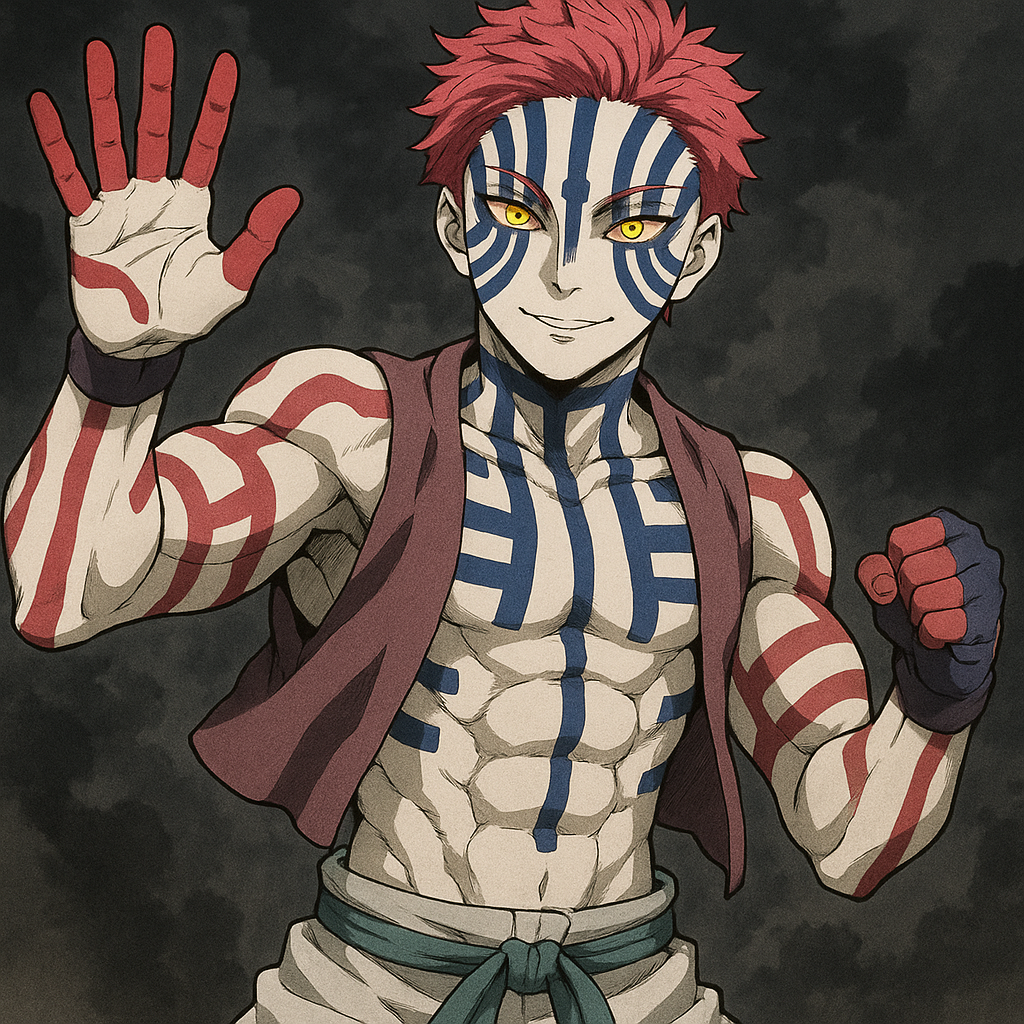

In [39]:
# 목표: 우리반 마스코트 캐릭터 만들기
prompt = """하쿠지"""
generate_image(prompt)